In [71]:
import obspy
from obspy import read
from obspy.core.trace import Stats
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy.stats as stats
from scipy.stats import norm,kurtosis
import math
import numpy as np
import seaborn as sns

# Data Reading

In [44]:
stream = read("..\\wcc\\SAC\\700\\*.SAC")
stream2 = read("..\\wcc\\SAC\\231\\*.SAC")
tr = stream.select(station="NIL08")[0]
tr2 = stream2.select(station="NIL06")[0]
tr2 = tr2.detrend()
print(tr2.stats.station)

NIL06


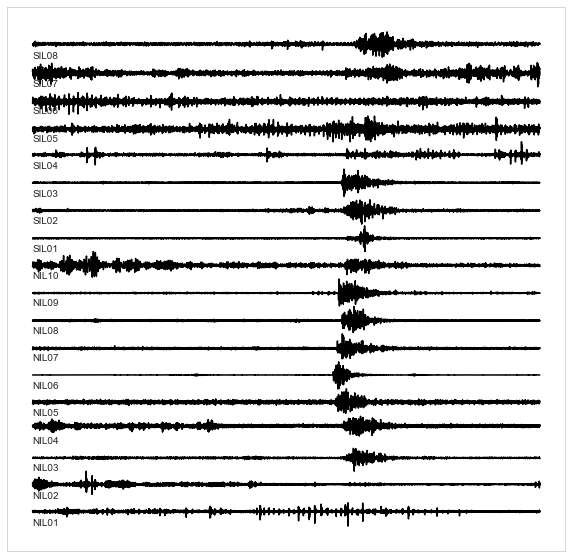

In [95]:
a = stream2.select(component='z')
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
ax = plt.gca()
for i in range(len(a)):
    plt.plot(normalize(a[i].data)+2*i,'k-')
    ax.text(0.05,(i-0.5)*2,str(a[i].stats.station))

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.show()

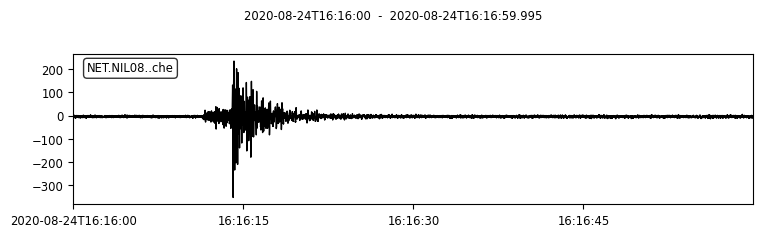

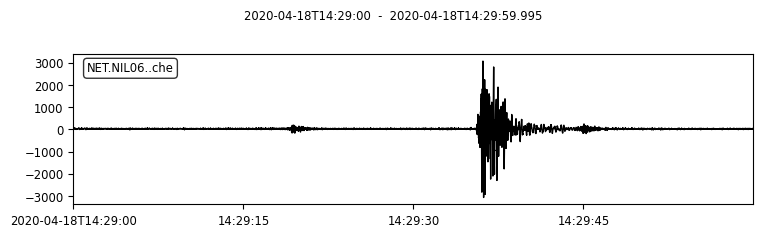

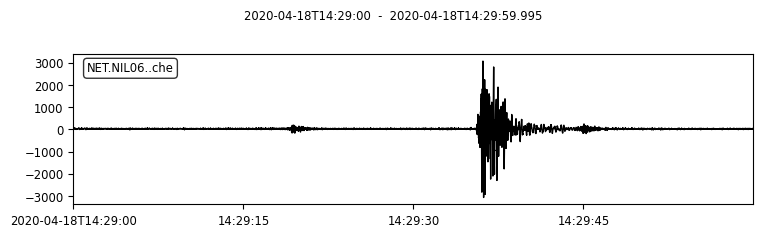

In [6]:
tr.plot()
tr2.plot()

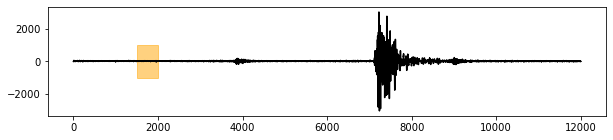

In [22]:
def normalize(data):
    return data/(max(abs(max(data)),abs(min(data))))

wf = normalize(tr.data[1500:6000])
wf2 = tr2.data[0:36000]
fig = plt.figure(figsize=(10,2))
ax = fig.add_subplot(1,1,1)
ax.plot(wf2,"k-")
ax.add_patch(
    patches.Rectangle(
        xy=(1500,-1000),
        width=500,
        height=2000,
        linewidth=1,
        color='orange',
        fill=True,
        alpha=0.5
    )
)
plt.show()

# Histogram Plotting

In [14]:
def variance(data):
    n = len(data)
    mean = sum(data)/n
    deviation = [(x-mean) ** 2 for x in data]
    variance = sum(deviation) / n
    return variance



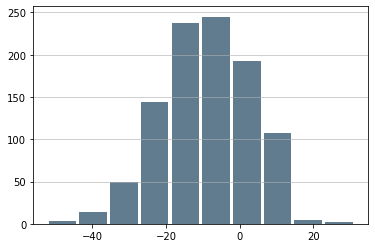

In [6]:
counts,bins,bar=plt.hist(wf2[0:1000],bins = 10, rwidth=0.9, color='#607c8e')
plt.grid(axis='y',alpha=0.75)

Text(0.5, 0, 'Data')

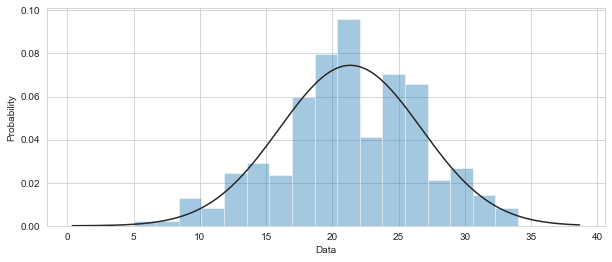

In [20]:
import seaborn as sns
from scipy.stats import norm
# sns.distplot(wf[500:1000],hist=True,bins=10)
fig=plt.figure(figsize=(10,4))
sns.set_style("whitegrid")
ax = sns.distplot(wf[1500:2000], fit=norm, kde=False)
plt.ylabel('Probability')
plt.xlabel('Data')

In [157]:
print(counts)
print(bins)
print(bar)

[   5.    5.   18.   43.  305.  505.   76.   36.    3.    4.]
[-143.  -110.9  -78.8  -46.7  -14.6   17.5   49.6   81.7  113.8  145.9
  178. ]
<a list of 10 Patch objects>


2.3105936412979697 4.545454545454546


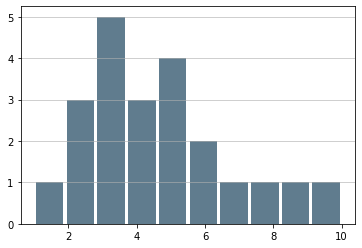

In [19]:
counts,bins,bar=plt.hist(data,bins = 10, rwidth=0.9, color='#607c8e')
plt.grid(axis='y',alpha=0.75)
# plt.plot(wf[0:1000], normal_distribution_curve,color="orange")
sigma = math.sqrt(variance(data))
mean = sum(data)/len(data)
print(sigma,mean)

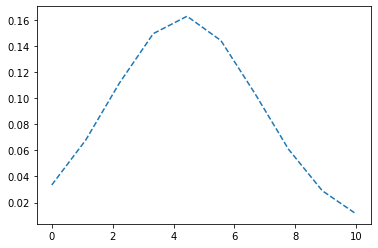

In [31]:
data = [0,1,2,5,3,5,6,3,3,4,5,3,2,2,6,7,8,4,5,4,3,9,10]

mean, sigma = stats.norm.fit(data)
x = np.linspace(0,10,10)
y = stats.norm(mean,sigma)
plt.plot(x,y.pdf(x),'--')
plt.show()

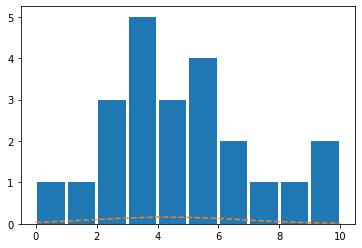

In [42]:
fig,ax = plt.subplots()
plt.hist(data, bins = 10, rwidth=0.9)
y = stats.norm.pdf(bins, mean, sigma)
ax.plot(bins,y,'--')
plt.show()

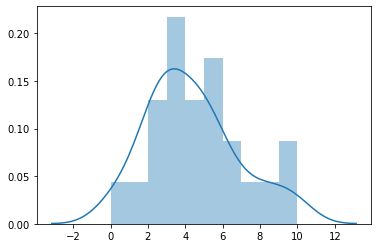

In [8]:
import seaborn as sns
sns.distplot(data,hist=True,bins=10)

# Standard Kurtosis

In [196]:
def kurtosistes(data,mean,sigma):
    kurt = 0
    for i in range(len(data)):
        kurt = kurt + (((data[i] - mean)/(sigma)) ** 4)
    kurt = kurt / len(data)
    return kurt

In [5]:
def kurtosis(wf,delay):
    n = int(delay*200)
    tes = []

    for i in range(n,len(wf)):
        i = int(i)
        data = wf[(i-n):i]
        mean, sigma = stats.norm.fit(data)
        a = stats.kurtosis(data)
        if a>0:
            tes.append(a)
        else:
            tes.append(0)
    #     kurt.append(kurtosis(data,mean,sigma))

    awal = np.full(n,tes[0],dtype=float)
    kurt = np.insert(tes,awal,tes[0], axis=0)
    
    return kurt

In [7]:
kurt4 = kurtosis(wf2,4)
kurt1 = kurtosis(wf2,1)
kurt2 = kurtosis(wf2,2)
kurt05 = kurtosis(wf2,0.5)

<ipython-input-5-4d822954a625>:17: DeprecationWarning: using a non-integer array as obj in insert will result in an error in the future
  kurt = np.insert(tes,awal,tes[0], axis=0)


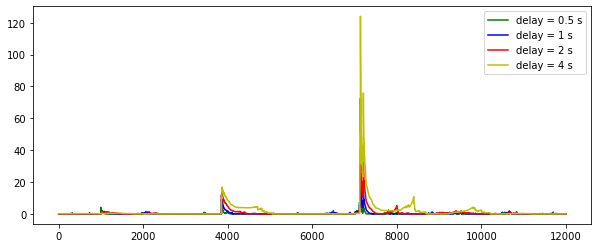

In [9]:
plt.figure(figsize=(10,4))

plt.plot(kurt05,'g-',label='delay = 0.5 s')
plt.plot(kurt1,'b-',label='delay = 1 s')
plt.plot(kurt2,"r-",label='delay = 2 s')
plt.plot(kurt4,'y-',label='delay = 4 s')
plt.legend()
plt.show()

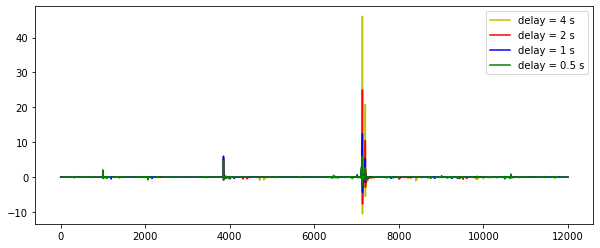

In [16]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,1,1)
#ax.plot(wf,"k-")
#ax.plot(kurt1*20,"r--")
ax.plot(np.gradient(kurt4),"y-",label='delay = 4 s')
ax.plot(np.gradient(kurt2),"r-",label='delay = 2 s')
ax.plot(np.gradient(kurt1),"b-",label='delay = 1 s')
ax.plot(np.gradient(kurt05),"g-",label='delay = 0.5 s')
# plt.xlim(500,1500)
# plt.ylim(0,4)
plt.legend()
plt.show()

# Function Library

In [97]:
def kurtosis_recursive(wf,delay):
    dt = 200 #sample rate
    n = int(delay*dt)
    w = n
    c = 1 - (1/w)
    
    tes = []
    mean1, sigma1 = norm.fit(wf[0:n]) # nilai awal
    meanx, sigmax = norm.fit(wf) # dipakai saat sigma < sigma1
    a1 = stats.kurtosis(wf[0:n]) # nilai awal
    a1 = 0
    for i in range(n,len(wf)):
        i = int(i)
        data = wf[(i-n):i]
        mean = c*mean1 + (1-c) * wf[i]
        sigma = c*sigma1 + (1-c) * (wf[i]-mean)**2
        
        if (sigma>sigmax) and (sigma!=0):
            a = c*a1 + (1-c) * ((wf[i]-mean)**4)/(sigma**2)
        else:
            a = c*a1 + (1-c) * ((wf[i]-mean)**4)/(sigmax**2)
        
        if a>0:
            tes.append(a)
        else:
            tes.append(0)
    #     kurt.append(kurtosis(data,mean,sigma))
        
        mean1 = mean
        sigma1 = sigma
        a1 = a

    awal = np.full(n,0,dtype=int)
    kurt = np.insert(tes,awal,tes[0], axis=0)
        
    return kurt

def cfhos(wf,delay):
    dt = 200 #sample rate
    n = int(delay*dt)
    w = n
    c = 1 - (1/w)
    
    tes = []
    mean1,sigma1= stats.norm.fit(wf[0:n]) # nilai awal
    m21, m41 = 0,0
    for i in range(n,len(wf)):
        data = wf[(i-n):i]
        mean = c*wf[i] + (1-c) * mean1
        m2 = c * (wf[i]-mean1)**2 + (1-c) * m21
        m4 = c * (wf[i]-mean1)**4 + (1-c) * m41
        hos = m4/m2**2
        
        mean1 = mean
        m21, m41 = m2, m4
        
        tes.append(hos)
    awal = np.full(n,tes[0],dtype=float)
    cfhos = np.insert(tes,awal,tes[0], axis=0)
        
    return cfhos

def cfenv(wf,delay):
    dt = 200 #sample rate
    n = int(delay*dt)
    w = n
    c = 1 - (1/w)
    
    tes = []
    rms1 = 0
    for i in range(n,len(wf)):
        data = wf[(i-n):i]
        rms = np.sqrt(c*wf[i]**2 + (1-c) * (rms1)**2)
        tes.append(rms)
        rms1 = rms
    awal = np.full(n,tes[0],dtype=float)
    cfenv = np.insert(tes,awal,np.int(tes[0]), axis=0)
        
    return cfenv


def stalta(wf,ns,nl):
#     ns = 50
#     nl = 300
    y = abs(wf)
    sta,lta = [],[]
    for i in range(nl,len(y)-ns):
        s = 1 / ns * sum([y[j] for j in range(i,i+ns)])
        l = 1 / nl * sum([y[j] for j in range(i-nl,i)])
        sta.append(s),lta.append(l)

    awal = np.full(nl,sta[0],dtype=int)
    sta = np.insert(sta,awal,0,axis=0)
    awal = np.full(nl,lta[0],dtype=int)
    lta = np.insert(lta,awal,0,axis=0)

    stalta = [sta[i]/lta[i] for i in range(len(sta))]
    return stalta



# STA/LTA

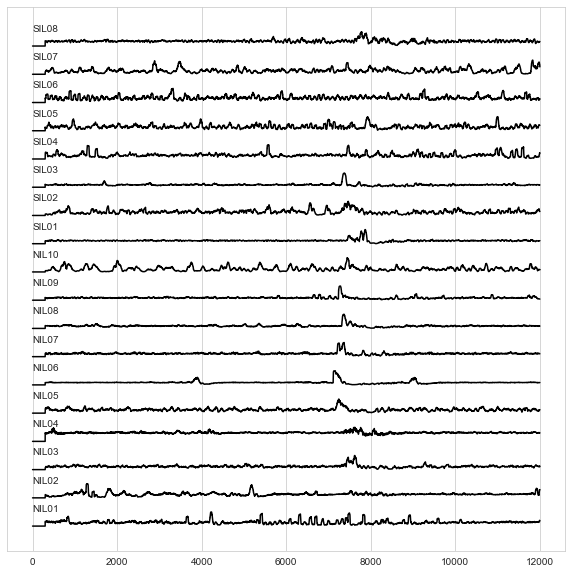

In [105]:
from obspy.signal.trigger import classic_sta_lta
from obspy.signal.trigger import recursive_sta_lta

#tes = stalta(a[5].data,50,300)
# tes = classic_sta_lta(a[5].data,50,300)
# plt.plot(tes)
a = stream2.select(component='z')
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
ax = plt.gca()
for i in range(len(a)):
    tes = classic_sta_lta(a[i].data,50,300)
    plt.plot(normalize(tes)+2*i,'k-')
    ax.text(0.05,(i+0.5)*2,str(a[i].stats.station))

# ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.show()

# Recursive Kurtosis

In [69]:
print(a[0].data)

[ 23.  25.  19. ...,   3.   3.   7.]


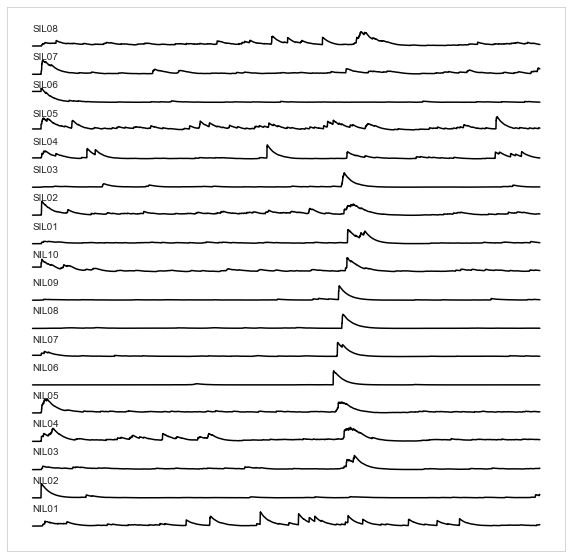

In [86]:
a = stream2.select(component='z')
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
ax = plt.gca()
for i in range(len(a)):
    rec = kurtosis_recursive(a[i].data,1)
    plt.plot(normalize(rec)+2*i,'k-')
    ax.text(0.05,(i+0.5)*2,str(a[i].stats.station))

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.show()

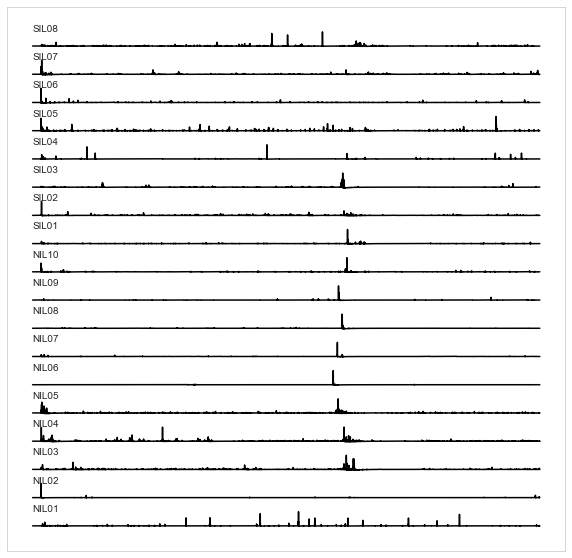

In [107]:
a = stream2.select(component='z')
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
ax = plt.gca()
for i in range(len(a)):
    rec = kurtosis_recursive(a[i].data,1)
    plt.plot(normalize(np.gradient(rec))+2*i,'k-')
    ax.text(0.05,(i+0.5)*2,str(a[i].stats.station))

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.show()

In [85]:
kurt2_rec = kurtosis_recursive(wf2,2)
# kurt1_rec = kurtosis_recursive(wf2,1)
# kurt4_rec = kurtosis_recursive(wf2,4)
# kurt05_rec = kurtosis_recursive(wf2,0.5)
# print(tes)

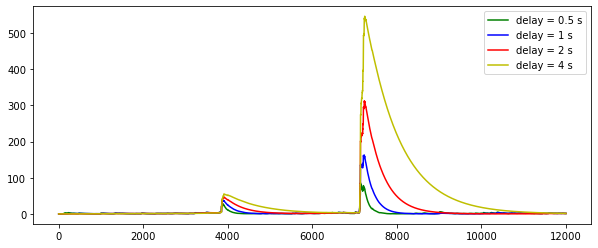

In [59]:
plt.figure(figsize=(10,4))

plt.plot(kurt05_rec,'g',label='delay = 0.5 s')
plt.plot(kurt1_rec,'b-',label='delay = 1 s')
plt.plot(kurt2_rec,"r-",label='delay = 2 s')
plt.plot(kurt4_rec,'y-',label='delay = 4 s')
plt.legend()
# plt.xlim(750,1100)
plt.show()

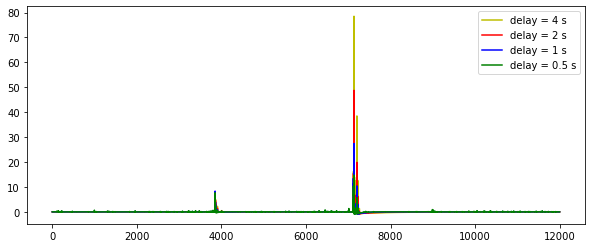

In [60]:
plt.figure(figsize=(10,4))

plt.plot(np.gradient(kurt4_rec),'y-',label='delay = 4 s')
plt.plot(np.gradient(kurt2_rec),"r-",label='delay = 2 s')
plt.plot(np.gradient(kurt1_rec),'b-',label='delay = 1 s')
plt.plot(np.gradient(kurt05_rec),'g',label='delay = 0.5 s')
plt.legend()
# plt.xlim(1250,1400)
plt.show()

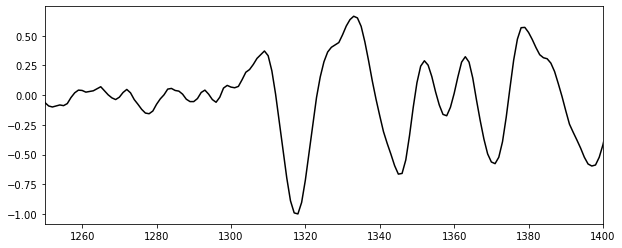

In [61]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,1,1)
ax.plot(wf,"k-")
#ax.plot(kurt05_rec*6,"r--", label = 'Kurtosis Rekursif')
#ax.plot(kurt2*4,"b--", label = 'Kurtosis Standar')
plt.xlim(1250,1400)
#plt.legend()
plt.show()

# CF HOS

In [104]:
cfhos1 = cfhos(wf2,1)

<ipython-input-101-c2d17f74a2f9>:59: DeprecationWarning: using a non-integer array as obj in insert will result in an error in the future
  cfhos = np.insert(tes,awal,tes[0], axis=0)


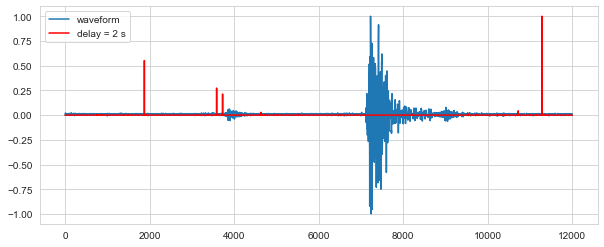

In [109]:
plt.figure(figsize=(10,4))
sns.set_style("whitegrid")

# plt.plot(kurt05_rec,'g',label='delay = 0.5 s')
# plt.plot(kurt1_rec,'b-',label='delay = 1 s')
# plt.plot(kurt4_rec,'y-',label='delay = 4 s')
plt.plot(normalize(wf2),"-", label='waveform')
plt.plot(normalize(cfhos1),"r-",label='delay = 2 s')
plt.legend()
# plt.xlim(750,1100)
plt.show()

# CF Envelope

In [107]:
cfenv1 = cfenv(wf2,1)

<ipython-input-106-babc9e2fba12>:77: DeprecationWarning: using a non-integer array as obj in insert will result in an error in the future
  cfenv = np.insert(tes,awal,tes[0], axis=0)


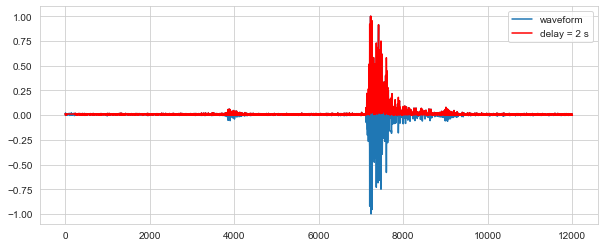

In [108]:
plt.figure(figsize=(10,4))
sns.set_style("whitegrid")

# plt.plot(kurt05_rec,'g',label='delay = 0.5 s')
# plt.plot(kurt1_rec,'b-',label='delay = 1 s')
# plt.plot(kurt4_rec,'y-',label='delay = 4 s')
plt.plot(normalize(wf2),"-", label='waveform')
plt.plot(normalize(cfenv1),"r-",label='delay = 2 s')
plt.legend()
# plt.xlim(750,1100)
plt.show()